In [2]:
from flickplay.get_connections import get_pymysql_con, get_alchemy_con
from flickplay.mongo import get_mongo_db_obj
from flickplay import query
import pandas as pd
import numpy as np

conp = get_pymysql_con()

q="""select event, $user_id, count(*) cnt
from fpa.events
GROUP BY event, $user_id;"""

df = pd.read_sql(q, conp)

df

,event,$user_id,cnt
0,$ae_first_open,None,17102
1,session__start,None,14019
2,performance__network,None,28690
3,profile_video__load_page,None,2746
4,signup__anonymous,None,1
...,...,...,...
579186,wallet__load_page,63b0b2554f3dad0318efb192,1
579187,session__end,63b0b2554f3dad0318efb192,1
579188,session__start,63b0b2554f3dad0318efb192,1
579189,splash_page__seen,63b0b2554f3dad0318efb192,1


In [3]:
users = pd.read_sql('''SELECT * FROM fpa.users2''', conp)

In [99]:
notOwn = users[(users.anonymous==0) & (users.ownsCertifiedNFT==0) & (users.isWeb3==1)]
own = users[(users.anonymous==0) & (users.ownsCertifiedNFT==1) & (users.isWeb3==1)]

In [102]:
# events = [
#     'video__swipe',
#     'video__seen',
#     'homefeed__load_page',
#     'video__comment_post',
#     'video_finalize__post']

In [103]:
df = df[df.event!='performance__network'].sort_values(by='cnt', ascending=False)

df

,event,$user_id,cnt,sum_cnt,event_frac,event_pct
420771,video__swipe,62d2b4ace7c5d7956ba85fbf,62672,99467,0.630078,63.007832
420040,video__swipe,62d2778ac412cd75e151c01d,55443,139757,0.396710,39.671000
396536,video__seen,62c7adc4b8deb3d981f8b8bc,37868,230688,0.164152,16.415245
138507,video__swipe,622e3ebd4d7d61371547088f,37639,117817,0.319470,31.947003
534,video__seen,609d510c4244340b2a77c83a,32037,180482,0.177508,17.750801
...,...,...,...,...,...,...
559961,store__navigate,618796d4caf7407011fe228f,1,377,0.002653,0.265252
496552,ob__collectible_card,6335f5f4107536a0ce7afa25,1,60,0.016667,1.666667
454698,perm__mic_native_grant,6302a1f31ae2e35ebd0ddf59,1,573,0.001745,0.174520
455914,video_finalize__post_success,6303461e74f02748f39a9376,1,1015,0.000985,0.098522


In [104]:
notOwnEventCounts = df[df['$user_id'].isin(notOwn.user_id)]
ownEventCounts    = df[df['$user_id'].isin(own.user_id)]

In [105]:
sums = df[['$user_id','cnt']].groupby('$user_id').sum().sort_values(by='cnt', ascending=False)
sums

,cnt
$user_id,
6293081e82c92e0a0ca0fd92,233585
62c7adc4b8deb3d981f8b8bc,230688
62a1e07c309538d8a0a774ce,201233
5df1201474236794fbe087bb,193614
609d510c4244340b2a77c83a,180482
...,...
62197da029ef695e00c61962,1
62194e6bc509b80e94d31615,1
62191f68d58e9cce0f423843,1


In [118]:
sumsE = df[['event','cnt']].groupby('event').sum().sort_values(by='cnt', ascending=False)
sumsE.iloc[:10]

,cnt
event,
video__seen,1017593
video__swipe,738374
map__coin_seen,352388
profile_video__load_list,346909
map__experience_pin_seen,286593
nav_bar__tab,284517
session__start,249329
video__watch,228928
session__end,178805


In [107]:
def get_count(user_id):
    try:
        return sums.loc[user_id].cnt
    except:
        return 0



In [108]:
df['sum_cnt'] = df['$user_id'].apply(lambda x: get_count(x))


In [109]:
df['event_frac'] = df.cnt/df.sum_cnt
df['event_pct'] = df.cnt/df.sum_cnt*100

In [110]:
notOwnE = df[df['$user_id'].isin(notOwn.user_id)]
ownE    = df[df['$user_id'].isin(own.user_id)]

In [111]:
ownE[ownE.event=='video__swipe'].mean()

cnt            1898.837104
sum_cnt       16657.072398
event_frac        0.070711
event_pct         7.071082
dtype: float64

In [112]:
df

,event,$user_id,cnt,sum_cnt,event_frac,event_pct
420771,video__swipe,62d2b4ace7c5d7956ba85fbf,62672,99467,0.630078,63.007832
420040,video__swipe,62d2778ac412cd75e151c01d,55443,139757,0.396710,39.671000
396536,video__seen,62c7adc4b8deb3d981f8b8bc,37868,230688,0.164152,16.415245
138507,video__swipe,622e3ebd4d7d61371547088f,37639,117817,0.319470,31.947003
534,video__seen,609d510c4244340b2a77c83a,32037,180482,0.177508,17.750801
...,...,...,...,...,...,...
559961,store__navigate,618796d4caf7407011fe228f,1,377,0.002653,0.265252
496552,ob__collectible_card,6335f5f4107536a0ce7afa25,1,60,0.016667,1.666667
454698,perm__mic_native_grant,6302a1f31ae2e35ebd0ddf59,1,573,0.001745,0.174520
455914,video_finalize__post_success,6303461e74f02748f39a9376,1,1015,0.000985,0.098522


In [113]:

events = [
    'video__swipe',
    'video__seen',
    'homefeed__load_page',
    'video__comment_post',
    'video_finalize__post']

for event in events:
    print()
    print('owns NFT', event)
    print(ownE[ownE.event==event].mean(),'\n')
    print('not owns NFT', event)
    print(notOwnE[notOwnE.event==event].mean())
    print()


owns NFT video__swipe
cnt            1898.837104
sum_cnt       16657.072398
event_frac        0.070711
event_pct         7.071082
dtype: float64 

not owns NFT video__swipe
cnt            277.091228
sum_cnt       3012.747368
event_frac       0.068504
event_pct        6.850419
dtype: float64


owns NFT video__seen
cnt            1767.594502
sum_cnt       12813.876289
event_frac        0.090778
event_pct         9.077824
dtype: float64 

not owns NFT video__seen
cnt            283.602326
sum_cnt       2060.572093
event_frac       0.097058
event_pct        9.705809
dtype: float64


owns NFT homefeed__load_page
cnt             267.113014
sum_cnt       12770.339041
event_frac        0.024106
event_pct         2.410592
dtype: float64 

not owns NFT homefeed__load_page
cnt             41.197895
sum_cnt       1872.080000
event_frac       0.030322
event_pct        3.032157
dtype: float64


owns NFT video__comment_post
cnt             101.054545
sum_cnt       31853.400000
event_frac        0.00

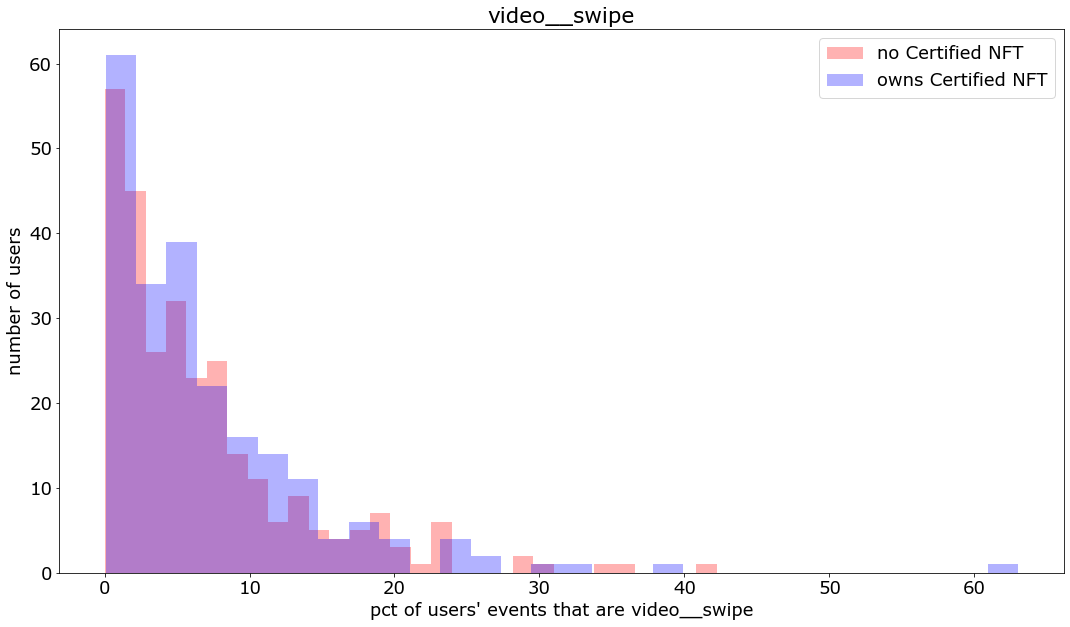

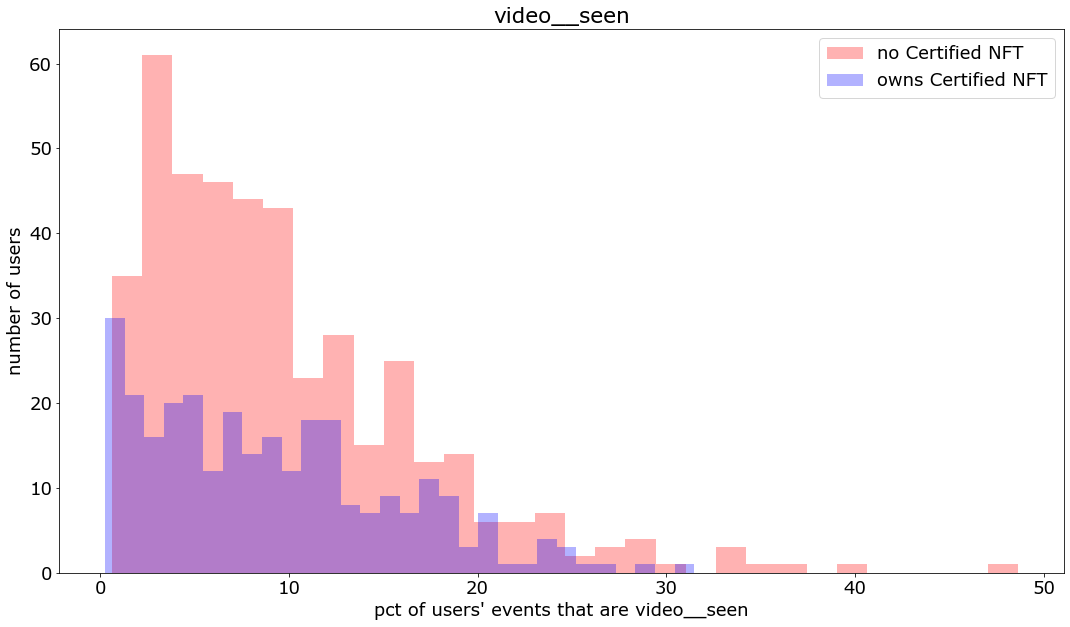

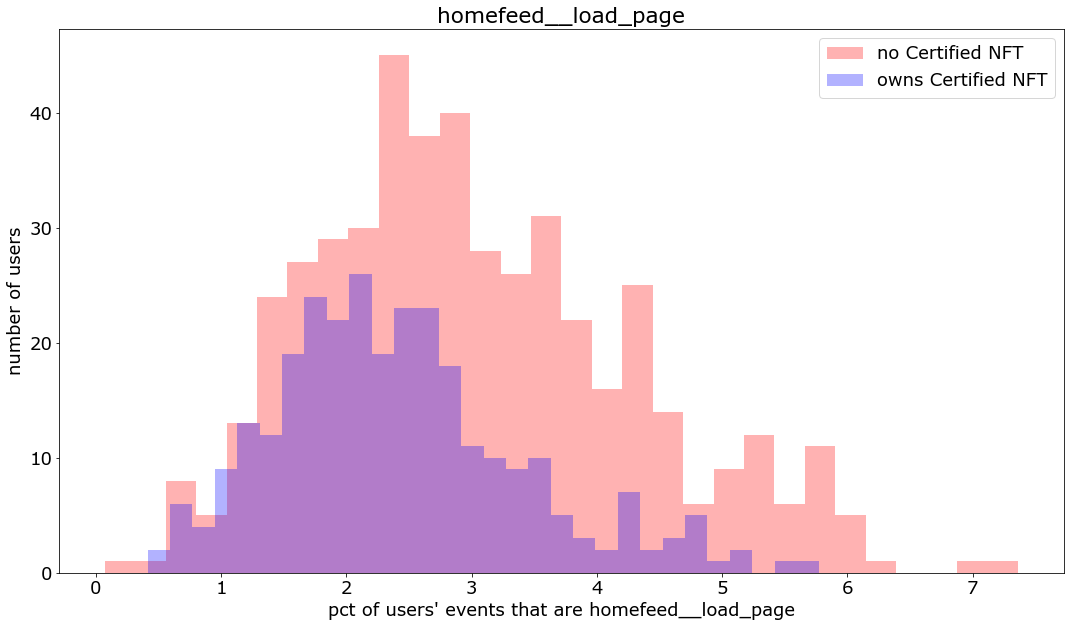

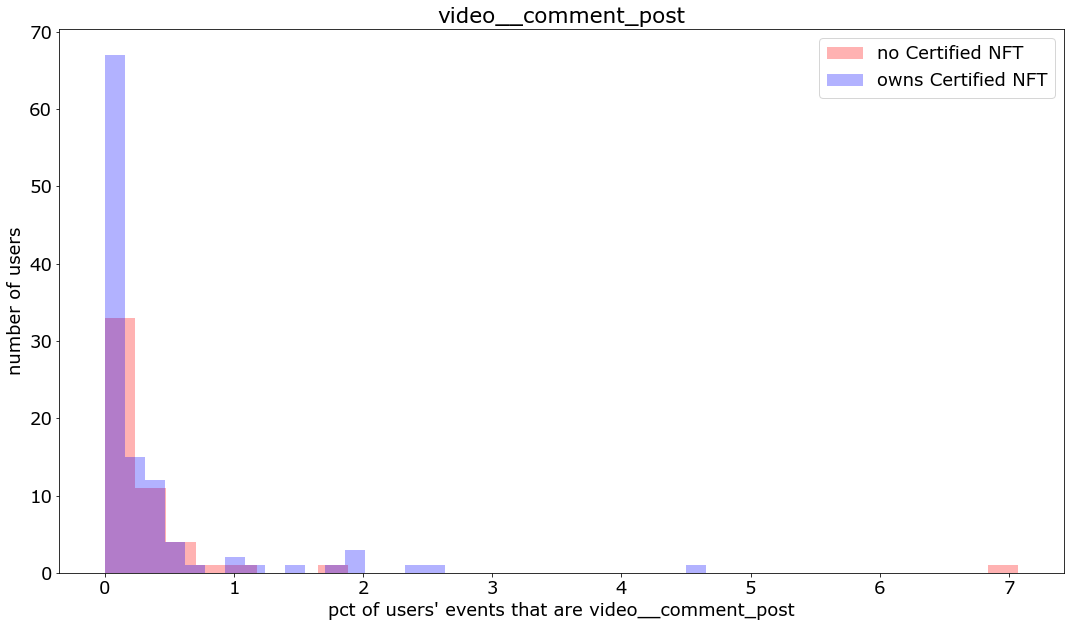

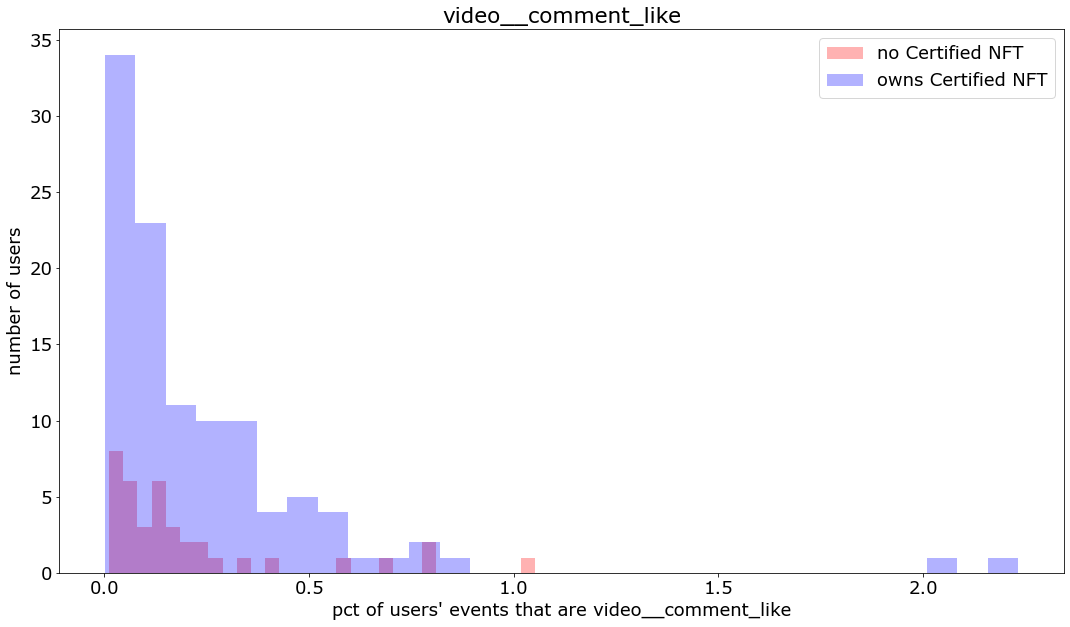

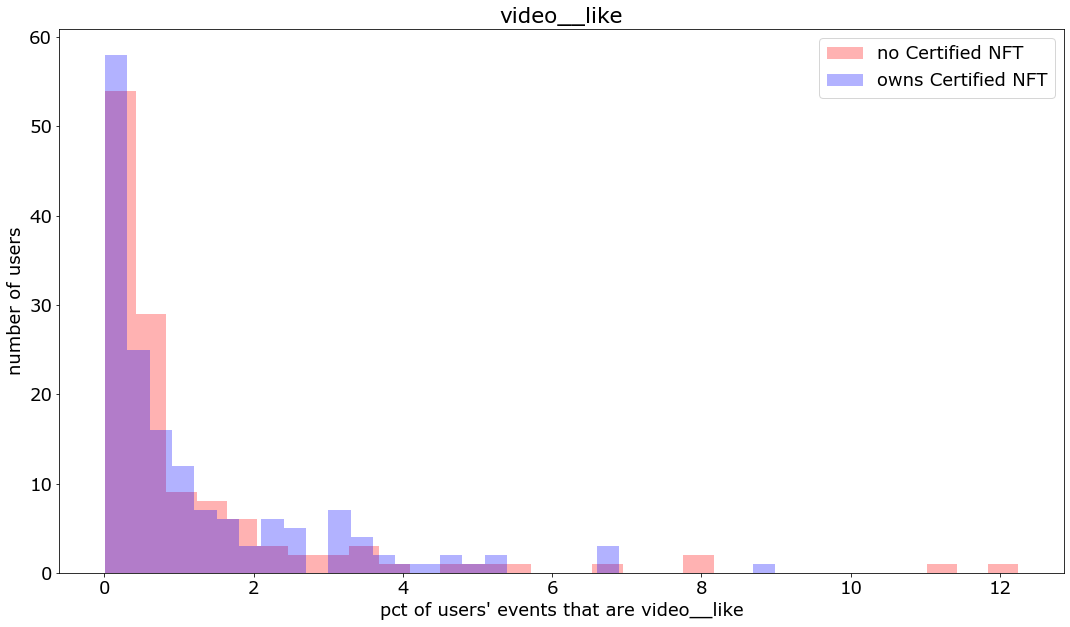

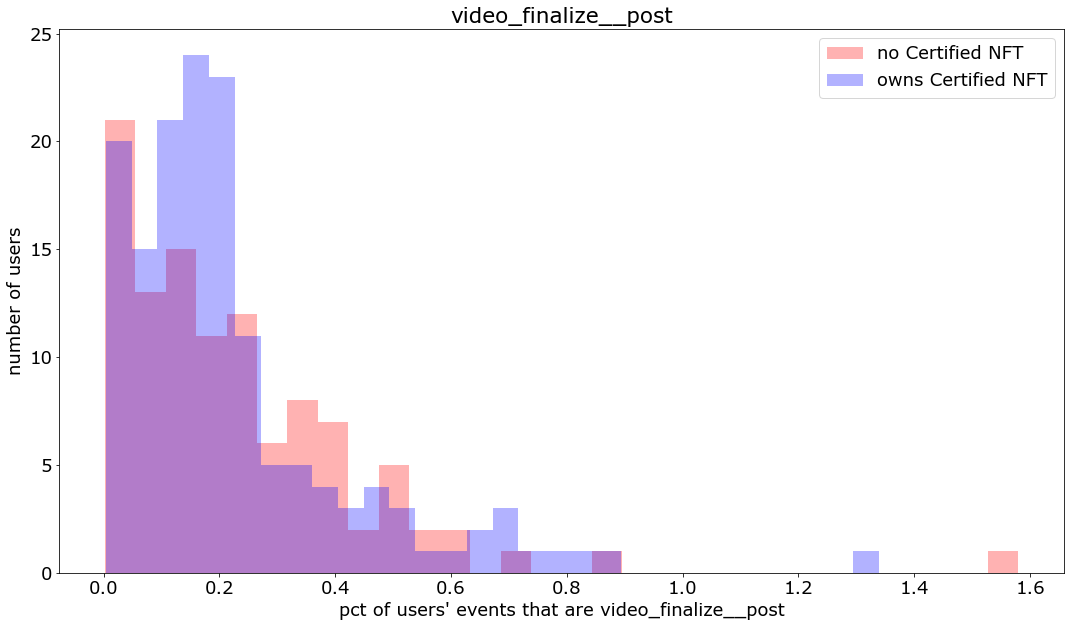

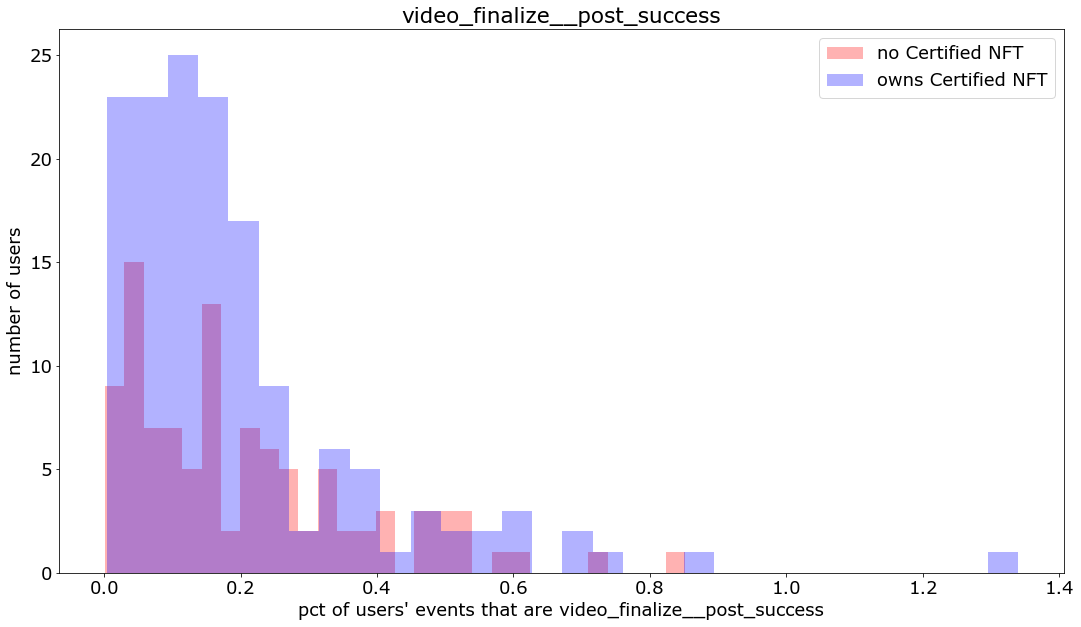

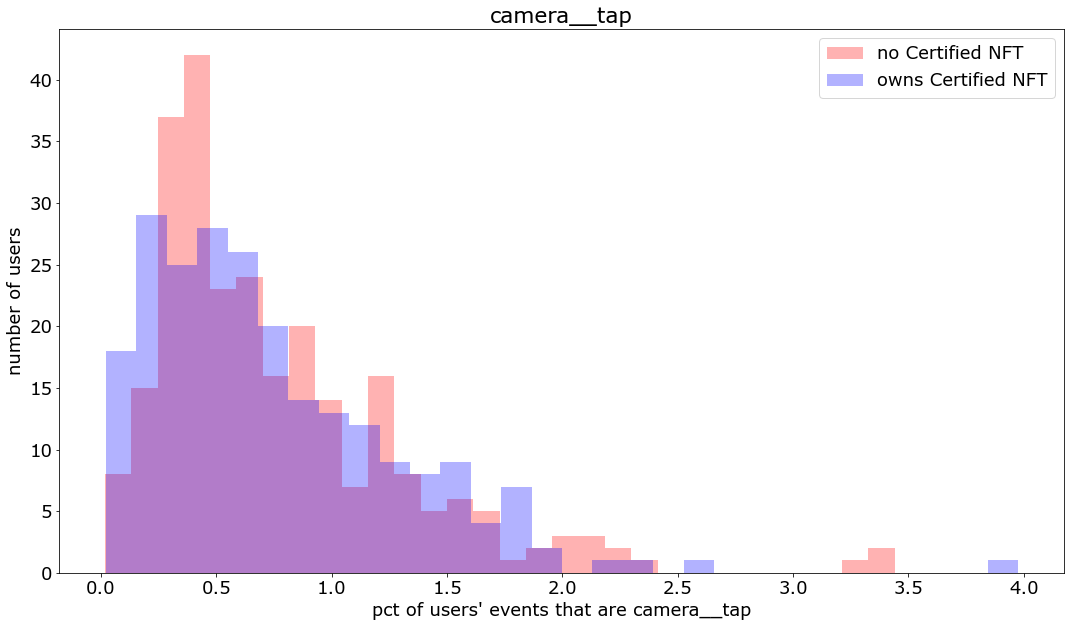

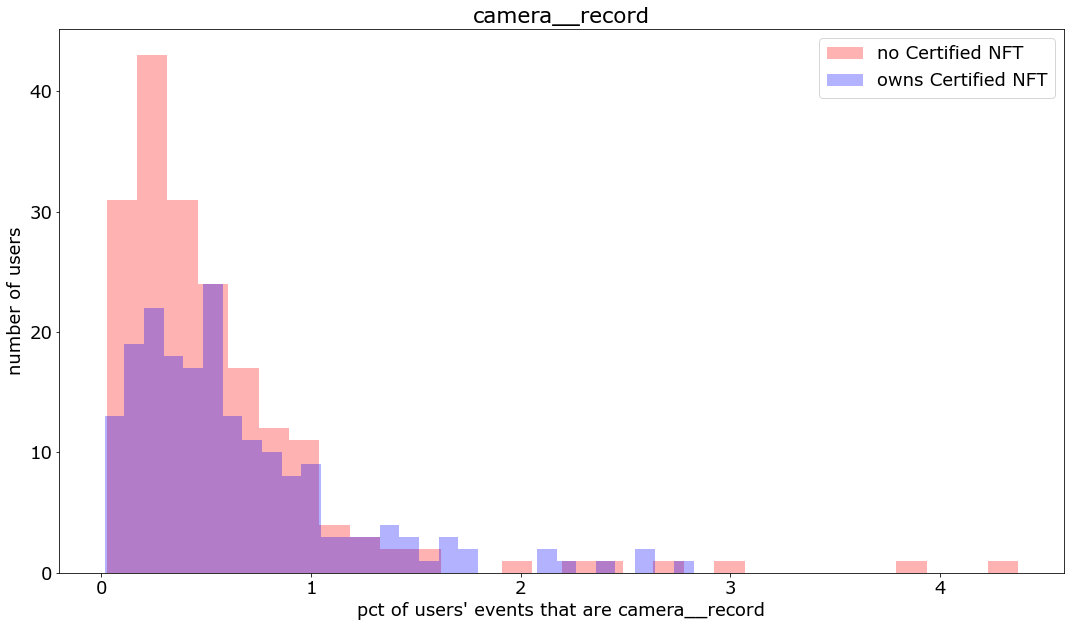

In [141]:
import matplotlib.pyplot as plt
from flickplay.utils import make_big



events = [
    'video__swipe',
    'video__seen',
    'homefeed__load_page',
    'video__comment_post',
    'video__comment_like',
    'video__like',
    'video_finalize__post',
    'video_finalize__post_success',
    # camera - make a recording, play with AR, share video, draft video etc
    'camera__tap',
    'camera__record']

DENSITY=False

for event in events:
    
    fig, ax = make_big()
    # plt.hist(notOwnE[notOwnE.event==event].event_pct, label='no NFT', bins=30)
    plt.hist(notOwnE[notOwnE.event==event].event_pct, label='no Certified NFT', bins=30, density=DENSITY, fc=(1,0,0,0.3))

    plt.hist(ownE[ownE.event==event].event_pct, label='owns Certified NFT', bins=30, density=DENSITY,fc=(0,0,1,0.3))
   

    plt.xlabel(f'pct of users\' events that are {event}')
    if DENSITY:
        plt.ylabel('pct of users')
    else:
        plt.ylabel('number of users')
    plt.legend()
    # plt.yscale('log')
    plt.title(event)
    plt.savefig(f'/Users/allen/Desktop/event_hist/{event}.jpg')
    plt.show()

In [146]:
users[(users.ownsCertifiedNFT==1) & (users.isWeb3 == 1)]

,_id,user_id,username,appleSignup,walletSignup,regularSignup,anonymous,unclassifiedSignup,signup_markers,ownsCertifiedNFT,...,collectionsCount,collectionsSavedCount,cameraPermission,locationPermission,notificationPermission,isMapCreator,allowAutopopulation,isCertified,allTimeLikes,createdThroughConnectWallet
8,5ee9463955c2ec52d977680a,5ee9463955c2ec52d977680a,fernandafell,0,0,1,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,authorized,1.0,0.0,0.0,987.0,0.0
54,5e39a3832a7ba9457211e0c5,5e39a3832a7ba9457211e0c5,sujinlee,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,1.0,1522.0,0.0
75,5eedb62f0d4758610b23e81e,5eedb62f0d4758610b23e81e,diazby_,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,denied,0.0,0.0,0.0,885.0,0.0
87,5e76616ed01b990524bf45a3,5e76616ed01b990524bf45a3,susy,1,0,0,0,0,1,1,...,0,12,authorized,authorizedWhenInUse,authorized,0.0,0.0,0.0,2399.0,0.0
99,5e0b417d2acee6434c311565,5e0b417d2acee6434c311565,yury,1,0,0,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,denied,0.0,0.0,0.0,3512.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62256,638a36a1c9b349b2720b4750,638a36a1c9b349b2720b4750,arizstemming,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,authorized,0.0,0.0,0.0,32.0,0.0
62328,638ba27e64e11c5fd159b57a,638ba27e64e11c5fd159b57a,ahmetalimert,0,1,0,0,0,1,1,...,0,0,notDetermined,authorizedWhenInUse,authorized,0.0,0.0,0.0,0.0,1.0
63237,63a894385ea8263892619a8a,63a894385ea8263892619a8a,fer1320,0,1,0,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,denied,0.0,0.0,0.0,13.0,1.0
63351,63addc7a042e7ac9c9e00d1a,63addc7a042e7ac9c9e00d1a,walletflicky_ekz95ei,0,1,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,0.0,0.0,1.0


In [144]:
print('Web3 Total:', len(notOwn)+len(own))
print('Doesn\'t Own:',len(notOwn))
print('Owns:',len(own))

Web3 Total: 768
Doesn't Own: 476
Owns: 292


In [120]:
len(own)

292

In [122]:
len(own)

292

In [97]:
users[(users.isWeb3==1) & (users.ownsCertifiedNFT==1)]

,_id,user_id,username,appleSignup,walletSignup,regularSignup,anonymous,unclassifiedSignup,signup_markers,ownsCertifiedNFT,...,collectionsCount,collectionsSavedCount,cameraPermission,locationPermission,notificationPermission,isMapCreator,allowAutopopulation,isCertified,allTimeLikes,createdThroughConnectWallet
8,5ee9463955c2ec52d977680a,5ee9463955c2ec52d977680a,fernandafell,0,0,1,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,authorized,1.0,0.0,0.0,987.0,0.0
54,5e39a3832a7ba9457211e0c5,5e39a3832a7ba9457211e0c5,sujinlee,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,1.0,1522.0,0.0
75,5eedb62f0d4758610b23e81e,5eedb62f0d4758610b23e81e,diazby_,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,denied,0.0,0.0,0.0,885.0,0.0
87,5e76616ed01b990524bf45a3,5e76616ed01b990524bf45a3,susy,1,0,0,0,0,1,1,...,0,12,authorized,authorizedWhenInUse,authorized,0.0,0.0,0.0,2399.0,0.0
99,5e0b417d2acee6434c311565,5e0b417d2acee6434c311565,yury,1,0,0,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,denied,0.0,0.0,0.0,3512.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62256,638a36a1c9b349b2720b4750,638a36a1c9b349b2720b4750,arizstemming,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,authorized,0.0,0.0,0.0,32.0,0.0
62328,638ba27e64e11c5fd159b57a,638ba27e64e11c5fd159b57a,ahmetalimert,0,1,0,0,0,1,1,...,0,0,notDetermined,authorizedWhenInUse,authorized,0.0,0.0,0.0,0.0,1.0
63237,63a894385ea8263892619a8a,63a894385ea8263892619a8a,fer1320,0,1,0,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,denied,0.0,0.0,0.0,13.0,1.0
63351,63addc7a042e7ac9c9e00d1a,63addc7a042e7ac9c9e00d1a,walletflicky_ekz95ei,0,1,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,0.0,0.0,1.0


In [98]:
users[(users.isWeb3==1) & 1]

,_id,user_id,username,appleSignup,walletSignup,regularSignup,anonymous,unclassifiedSignup,signup_markers,ownsCertifiedNFT,...,collectionsCount,collectionsSavedCount,cameraPermission,locationPermission,notificationPermission,isMapCreator,allowAutopopulation,isCertified,allTimeLikes,createdThroughConnectWallet
8,5ee9463955c2ec52d977680a,5ee9463955c2ec52d977680a,fernandafell,0,0,1,0,0,1,1,...,0,0,authorized,authorizedWhenInUse,authorized,1.0,0.0,0.0,987.0,0.0
54,5e39a3832a7ba9457211e0c5,5e39a3832a7ba9457211e0c5,sujinlee,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,1.0,1522.0,0.0
70,5eb5967417204a4a41a47bec,5eb5967417204a4a41a47bec,npalrecha,0,0,1,0,0,1,0,...,0,0,authorized,authorizedWhenInUse,authorized,0.0,0.0,0.0,0.0,0.0
71,5ecaee31e42ea9d177f4d037,5ecaee31e42ea9d177f4d037,santi,0,0,1,0,0,1,0,...,0,11,authorized,authorizedWhenInUse,authorized,0.0,0.0,0.0,1524.0,0.0
75,5eedb62f0d4758610b23e81e,5eedb62f0d4758610b23e81e,diazby_,1,0,0,0,0,1,1,...,0,0,authorized,notDetermined,denied,0.0,0.0,0.0,885.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63351,63addc7a042e7ac9c9e00d1a,63addc7a042e7ac9c9e00d1a,walletflicky_ekz95ei,0,1,0,0,0,1,1,...,0,0,authorized,notDetermined,notDetermined,0.0,0.0,0.0,0.0,1.0
63352,63addf67ecedd07d6c2daa18,63addf67ecedd07d6c2daa18,penoplast,1,0,0,0,0,1,1,...,0,0,notDetermined,notDetermined,denied,0.0,0.0,0.0,0.0,0.0
63355,63ade334ecedd029c02dc036,63ade334ecedd029c02dc036,rhinog313,1,0,0,0,0,1,0,...,0,0,authorized,authorizedWhenInUse,authorized,0.0,0.0,0.0,1.0,0.0
63371,63ae2da6e813a3d697e0e3f9,63ae2da6e813a3d697e0e3f9,walletflicky_hbtgi1d,0,1,0,0,0,1,0,...,0,0,notDetermined,notDetermined,authorized,0.0,0.0,0.0,2.0,1.0
